## Вариант 13.
### Задания 6.1.13, 6.2.5, 6.5.5, 6.6.13, 6.9.13

In [1]:
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Задание 6.1.13

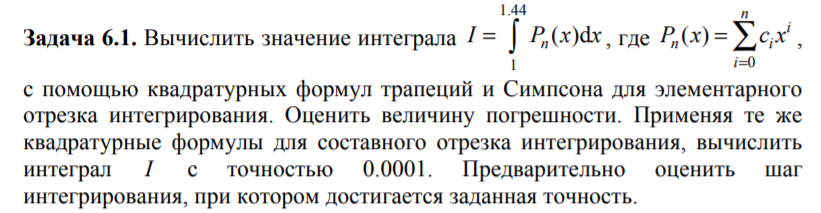

In [193]:
Image('6.1.png')

In [3]:
c = [4.9, 5.3, 3.3, 0.8, 5.1]
a = 1
b = 1.44
Integral_value_true = 13.1412
def P(x,c=c):
    return c[0] + c[1] * x + c[2] * x**2 + c[3] * x ** 3 + c[4] * x**4

def I(c,x):
    return c[0] * x + c[1] / 2 * x**2 + c[2] / 3 * x**3 + c[3] / 4 * x ** 4 + c[4] / 5 * x**5
Integral_value = I(c,b) - I(c,a)

### Применим квадратурные формулы трапеций и Симпсона считая отрезок [1,1.44] элементарным отрезком интегрирования

In [4]:
n = 1
x = np.linspace(a,b,n+1)
h = x[1] - x[0]
def trap(x, h, n, P = P):
    return h*((P(x[0]) + P(x[n]))/2  + np.sum(np.array([P(x[i]) for i in range(1,n)])))

def Simpson(x,h,n):
    return h/6*(P(x[0]) + 4 * np.sum(np.array([P((x[i] + x[i+1])/2) for i in range(0,n)])) + 
                2 * np.sum(np.array([P(x[i]) for i in range(1,n)])) + P(x[n]))
    
Int_trap = trap(x,h,n)
Int_Simpson = Simpson(x,h,n)
abs_error_trap = np.abs(Int_trap - Integral_value_true)
abs_error_Simpson = np.abs(Int_Simpson - Integral_value_true)
print("Абсолютная погрешность трапеций = " , abs_error_trap, "\nАбсолютная погрешность Симпсона = ", abs_error_Simpson)

Абсолютная погрешность трапеций =  0.7392014131199964 
Абсолютная погрешность Симпсона =  0.0006578367999967583


#### Очевидно, что по двум точкам качество не должно было быть хорошим, поэтому метод трапеций даёт такую большую погрешность. Однако формулы Симпсона неплохо справились так то)

### Применим квадратурные формулы трапеций и Симпсона для составного отрезка интегрирования 

In [196]:
h_0 = (2*0.0001)/(P(b)*(b-a))
n = round((b-a)/h_0)
h_0 = (b-a) / n
x_0 = np.arange(a,b+h_0, h_0)
Int_trap_with_h_0 = trap(x_0,h_0, x_0.shape[0] - 1)
abs_error_trap_with_h_0 = np.abs(Int_trap_with_h_0 - Integral_value_true)
Int_Simpson_with_h_0 = Simpson(x_0,h_0, x_0.shape[0] - 1)
abs_error_Simpson_with_h_0 = np.abs(Int_Simpson_with_h_0 - Integral_value_true) 
print("Абсолютная погрешность трапеций = ", abs_error_trap_with_h_0, "\nАбсолютная погрешность Симпсона = ",
      abs_error_Simpson_with_h_0)

Абсолютная погрешность трапеций =  4.305675338933668e-05 
Абсолютная погрешность Симпсона =  4.305716820596217e-05


#### Получили погрешность меньше 0.0001, как и хотели

## Задание 6.2.5 (Метод = Правых прямоугольников)

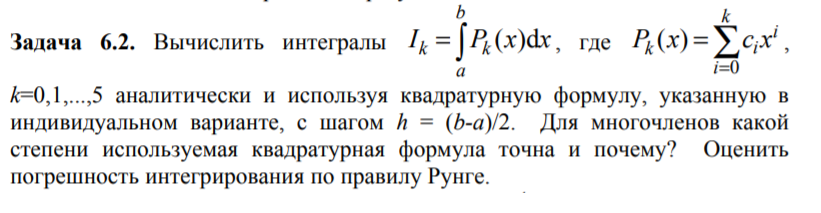

In [197]:
Image('6.2.png')

In [5]:
c = np.array([1,1,0.3,0.4,0.5,0.6])
a = 0
b = 1
h = (b-a)/2
I_true = np.array([1,1.5,1.6,1.7,1.8,1.9])
def P_2(c,x):
    while(c.shape[0] != 6):
        c = np.append(c,0)
    return c[0] + c[1] * x + c[2] * x**2 + c[3] * x**3 + c[4] * x**4 + c[5] * x**5
def right_rect(x,h,n,c):
    return h * np.sum(np.array([P_2(c,x[i]) for i in range(1,n)]))

In [199]:
x = np.arange(a,b+h,h)
n = x.shape[0]
I_r_r = []
for k in range(1,7):
    I_r_r.append(right_rect(x,h,n,c[:k]))
I_r_r = np.array(I_r_r)
I_r_r - I_true

array([0.      , 0.25    , 0.3375  , 0.4625  , 0.628125, 0.8375  ])

#### Исходная форма точна только для констант, т.к. график функции под константой можно точно разбить на прямоугольники, а остальные уже нет.
### Теперь оценим погрешности интегрирования по правилу Рунге $ \Delta _{{2n}}\approx \Theta |I_{{2n}}-I_{{n}}|$

In [200]:
n_2 = 2*n

In [201]:
h_2 = (b-a)/(n_2 - 1)
x_2 = np.arange(a,b+h_2,h_2)
I_r_r_2 = []
for k in range(1,7):
    I_r_r_2.append(right_rect(x_2,h_2,n_2,c[:k]))
I_r_r_2 = np.array(I_r_r_2)
Runge_error = 1/3*(np.abs(I_r_r_2 - I_r_r))
for i in range (Runge_error.shape[0]):
    print("Погрешность Рунге для многочлена P" + str(i) + " = ", Runge_error[i])

Погрешность Рунге для многочлена P0 =  0.0
Погрешность Рунге для многочлена P1 =  0.050000000000000044
Погрешность Рунге для многочлена P2 =  0.06849999999999992
Погрешность Рунге для многочлена P3 =  0.09549999999999992
Погрешность Рунге для многочлена P4 =  0.13182833333333313
Погрешность Рунге для многочлена P5 =  0.17831333333333338


### Задание 6.5.5 (Метод трапеций)

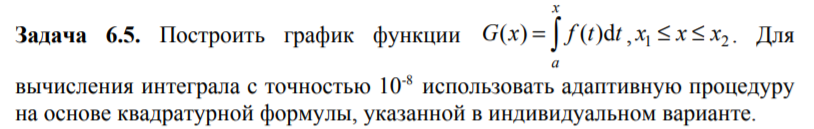

In [202]:
Image("6.5.png")

In [6]:
a = 0
x_1 = 1
x_2 = 4
eps = 1e-8
def f(t):
    return np.sin(t)/(t**2 + 1)

### Найдём значение интеграла в 10 точках на отрезке $[x_1,x_2]$, используя квадратурные формулы трапеций с точностью $10^{-8}$ и построим график по найденным значениям

In [244]:
%%time
b_arr = np.linspace(x_1,x_2, 10)
G = []
for b in b_arr:
    h = 2*eps/(np.abs(f(b)) * (b-a))
    n = int(round((b-a)/h))
    h = (b-a)/n
    x = np.arange(a, b + h, h)
    G.append(trap(x,h,n-1,f))

Wall time: 20min 21s


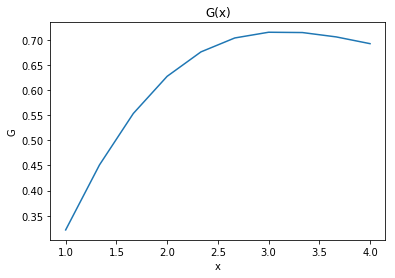

In [248]:
plt.plot(b_arr,G)
plt.title("G(x)")
plt.xlabel("x")
plt.ylabel("G");

## Задание 6.6.13

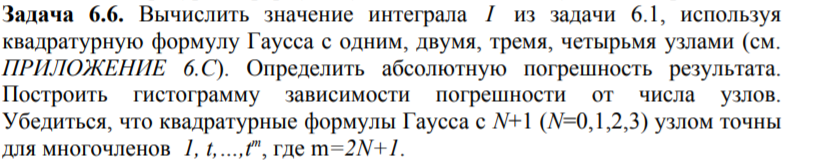

In [250]:
Image("6.6.png")

In [7]:
A = [[2],[1, 1],[0.55555555555556, 0.88888888888888, 0.55555555555556] , 
     [0.347854845137454, 0.652145154862546, 0.652145154862546, 0.347854845137454]]
t = [[0], [-0.577350269189626, 0.577350269189626], [-0.77459666929954, 0, 0.77459666929954], 
     [-0.861136311594052, -0.339981043584856, 0.339981043584856, 0.861136311594052]]
a = 1
b = 1.44
def Gaus(n, a = a, b = b, f = P, A = A, t = t):
        return (b-a)/2*np.sum(np.array([A[n-1][i]*f((a+b)/2 + (b-a)/2*t[n-1][i]) for i in range(n)]))

In [291]:
I_Gaus = []
for n in range(1,5):
    I_Gaus.append(Gaus(n))
I_Gaus_abs_error = np.abs(np.array(I_Gaus) - Integral_value_true)
for i in range(I_Gaus_abs_error.shape[0]):
    print("Абсолютная погрешность при " + str(i+1) +" узлах = ", I_Gaus_abs_error[i])

Абсолютная погрешность при 1 узлах =  0.36861395136000397
Абсолютная погрешность при 2 узлах =  0.0005103197866684894
Абсолютная погрешность при 3 узлах =  4.305709659213619e-05
Абсолютная погрешность при 4 узлах =  4.305715200203508e-05


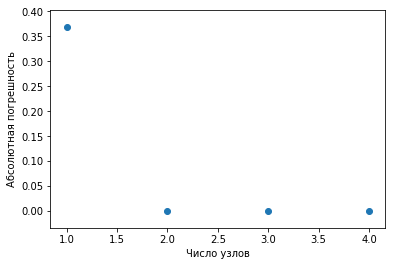

In [292]:
plt.scatter(np.arange(1,5),I_Gaus_abs_error)
plt.xlabel("Число узлов")
plt.ylabel("Абсолютная погрешность");

#### Убедимся, что квадратурные формулы Гаусса с N+1 (N=0,1,2,3) узлом точны для многочленов 1, t,…,$t^m$, где m=2N+1.

In [293]:
def func(x,m):
    return x**m
def Gaus_for_pol(n, m, a = a, b = b, A = A, t = t):
    return (b-a)/2*np.sum(np.array([A[n-1][i]*func((a+b)/2 + (b-a)/2*t[n-1][i],m) for i in range(n)]))
for N in range(4):
    m = 2*N + 1
    for j in range(m + 1):
        print("N = ", N, "Многочлен = t^",j, "Error = ", Gaus_for_pol(N+1, j) - func(b,j+1)/(j+1) + func(a,j+1)/(j+1))

N =  0 Многочлен = t^ 0 Error =  0.0
N =  0 Многочлен = t^ 1 Error =  0.0
N =  1 Многочлен = t^ 0 Error =  0.0
N =  1 Многочлен = t^ 1 Error =  0.0
N =  1 Многочлен = t^ 2 Error =  -5.551115123125783e-17
N =  1 Многочлен = t^ 3 Error =  0.0
N =  2 Многочлен = t^ 0 Error =  0.0
N =  2 Многочлен = t^ 1 Error =  0.0
N =  2 Многочлен = t^ 2 Error =  1.0640932579519813e-12
N =  2 Многочлен = t^ 3 Error =  3.894773392687512e-12
N =  2 Многочлен = t^ 4 Error =  9.56484891290188e-12
N =  2 Многочлен = t^ 5 Error =  1.970060226064163e-11
N =  3 Многочлен = t^ 0 Error =  0.0
N =  3 Многочлен = t^ 1 Error =  0.0
N =  3 Многочлен = t^ 2 Error =  -5.551115123125783e-17
N =  3 Многочлен = t^ 3 Error =  -1.1102230246251565e-16
N =  3 Многочлен = t^ 4 Error =  -1.6653345369377348e-16
N =  3 Многочлен = t^ 5 Error =  -8.326672684688674e-17
N =  3 Многочлен = t^ 6 Error =  5.551115123125783e-17
N =  3 Многочлен = t^ 7 Error =  0.0


#### Ну, это всегда очень маленькое число, которое можно(?) считать за 0
## Задание 6.9.13 (Гаусс с 3мя узлами)

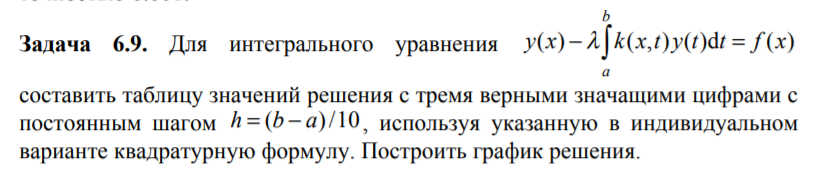

In [295]:
Image("6.9.png")

In [287]:
def k(x,t):
    return np.arcsin(0.1*x*t)
def f_2(x):
    return 1-x
l = -0.7
a = 0
b = 1
h = (b-a)/10

In [288]:
t_curr = np.array(t[2])
A_curr = np.array(A[2])
x_help = (b-a)/2*t_curr + (a+b)/2

### Путём решения системы из трёх линейных уравнений найдём значения неизвестной функции y(x) в точках x = (b-a)/2*t + (b+a)/2, где t - значения для 3х узлов формулы Гаусса

In [289]:
M = np.zeros((3,3))
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        M[i][j] = -l*(b-a)/2*A_curr[j]*k(x_help[i],x_help[j])
        if i == j:
            M[i][j] += 1
c = f_2(x_help)

In [290]:
y_help = np.linalg.solve(M,c)
y_help

array([0.88601346, 0.49429902, 0.10258206])

#### Проверим, верны ли наши вычисления, подставив найденные значения в исохжное интегральное уравнение, преобразованное с помощью формулы Гаусса.

In [291]:
for i in range (3):
    print(y_help[i] - l*(b-a)/2*np.sum(np.array([A_curr[j]*y_help[j]*k(x_help[i],x_help[j]) for j in range(3)])) - f_2(x_help)[i])

-1.1102230246251565e-16
0.0
0.0


#### Проверка прошла успешно, т.е. теперь мы знаем значения неизвестной функции y в узловых точках и можем найти значение для любой из точек.

In [292]:
x = np.arange(a, b + h, h)
def y_func(x, k = k, y_help = y_help, A = A_curr, t = t_curr, l = l, f = f_2):
    return f(x) + l * np.sum(np.array([A[i]*k(x,x_help[i])*y_help[i] for i in range(3)]))

In [293]:
y = []
for x_ in x:
    y.append(np.round(y_func(x_),3))
y = np.array(y)

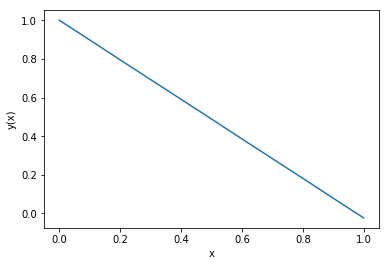

In [296]:
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y(x)");

### Эта функция почти линейная и очень похожа на 1-х. При подстановке у(х) = 1-х в исходное интегральное уравнение получили почти что тождество, что говорит о том, что функция верна.